# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [223]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [224]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [225]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 4 of Set 1 | toga village
City not found. Skipping...
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | isetskoye
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | leava
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | saint-paul
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | selfoss
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | ebano
City not found. Skipping...
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | e

Processing Record 37 of Set 4 | kiruna
Processing Record 38 of Set 4 | al ghayzah
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | port mathurin
Processing Record 41 of Set 4 | shingu
Processing Record 42 of Set 4 | el colorado
Processing Record 43 of Set 4 | smithers
Processing Record 44 of Set 4 | sinabang
Processing Record 45 of Set 4 | rio grande
Processing Record 46 of Set 4 | cadale
Processing Record 47 of Set 4 | salekhard
Processing Record 48 of Set 4 | aberdeen
Processing Record 49 of Set 4 | belyayevka
Processing Record 0 of Set 5 | palikir - national government center
Processing Record 1 of Set 5 | suomussalmi
Processing Record 2 of Set 5 | uturoa
Processing Record 3 of Set 5 | san mariano
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | ad dabbah
Processing Record 6 of Set 5 | ola
Processing Record 7 of Set 5 | puerto deseado
Processing Record 8 of Set 5 | tame
Processing Record 9 of Set 5 | troitsko-pechorsk
Processing Record 10 of

Processing Record 25 of Set 8 | moab
Processing Record 26 of Set 8 | najaf
Processing Record 27 of Set 8 | sirte
Processing Record 28 of Set 8 | afaahiti
Processing Record 29 of Set 8 | petropavlovka
Processing Record 30 of Set 8 | tralee
Processing Record 31 of Set 8 | jamestown
Processing Record 32 of Set 8 | santiago de cao
Processing Record 33 of Set 8 | yeniseysk
Processing Record 34 of Set 8 | rio gallegos
Processing Record 35 of Set 8 | anzhero-sudzhensk
City not found. Skipping...
Processing Record 36 of Set 8 | emerald
Processing Record 37 of Set 8 | tshikapa
Processing Record 38 of Set 8 | nanao
Processing Record 39 of Set 8 | north platte
Processing Record 40 of Set 8 | haiku-pauwela
Processing Record 41 of Set 8 | spring creek
Processing Record 42 of Set 8 | okahao
Processing Record 43 of Set 8 | gaalkacyo
Processing Record 44 of Set 8 | balkashino
Processing Record 45 of Set 8 | san julian
Processing Record 46 of Set 8 | leua
Processing Record 47 of Set 8 | ad dujayl
Proce

Processing Record 15 of Set 12 | qarauyl
Processing Record 16 of Set 12 | quellon
Processing Record 17 of Set 12 | muynoq
Processing Record 18 of Set 12 | susanville
Processing Record 19 of Set 12 | murray bridge
Processing Record 20 of Set 12 | barah
Processing Record 21 of Set 12 | acarau
Processing Record 22 of Set 12 | posse
Processing Record 23 of Set 12 | ciudad melchor muzquiz
Processing Record 24 of Set 12 | laguna
Processing Record 25 of Set 12 | seminole
Processing Record 26 of Set 12 | tropea
Processing Record 27 of Set 12 | taoudenni
Processing Record 28 of Set 12 | pacific grove
Processing Record 29 of Set 12 | preobrazheniye
Processing Record 30 of Set 12 | lobez
Processing Record 31 of Set 12 | muisne
Processing Record 32 of Set 12 | nuku'alofa
Processing Record 33 of Set 12 | egilsstadir
Processing Record 34 of Set 12 | dokkum
Processing Record 35 of Set 12 | primorsk
Processing Record 36 of Set 12 | ceeldheer
Processing Record 37 of Set 12 | reggane
Processing Record 3

In [226]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [227]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,1.85,93,100,1.54,CA,1686216492
1,hermanus,-34.4187,19.2345,16.38,81,99,10.16,ZA,1686216493
2,lebu,-37.6167,-73.6500,14.44,86,99,11.87,CL,1686216495
3,isetskoye,56.4858,65.3226,19.98,45,68,3.84,RU,1686216495
4,vilyuchinsk,52.9306,158.4028,14.15,77,50,1.50,RU,1686216496


In [228]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [229]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,1.85,93,100,1.54,CA,1686216492
1,hermanus,-34.4187,19.2345,16.38,81,99,10.16,ZA,1686216493
2,lebu,-37.6167,-73.6500,14.44,86,99,11.87,CL,1686216495
3,isetskoye,56.4858,65.3226,19.98,45,68,3.84,RU,1686216495
4,vilyuchinsk,52.9306,158.4028,14.15,77,50,1.50,RU,1686216496


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

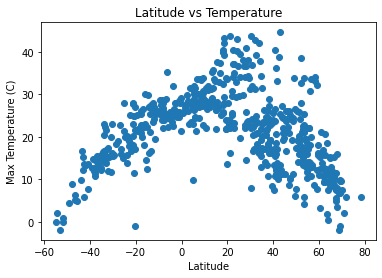

In [230]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"]
temps = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitudes, temps,)
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") 

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

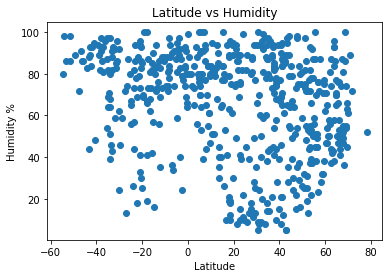

In [231]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitudes, humidity,)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

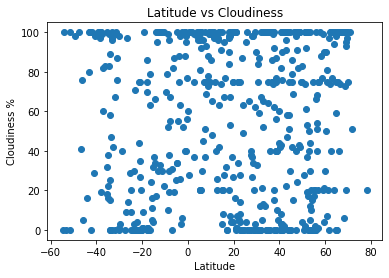

In [232]:
# Build the scatter plots for latitude vs. cloudiness
Latitude = city_data_df["Lat"]
Cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(Latitude, Cloudiness,)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

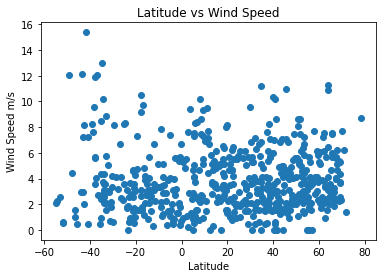

In [233]:
# Build the scatter plots for latitude vs. wind speed
Latitude = city_data_df["Lat"]
Wind_Speed  = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(Latitude, Wind_Speed,)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [234]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="r")
    plt.show()
    print("The r value is: ", rvalue)

In [235]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,1.85,93,100,1.54,CA,1686216492
3,isetskoye,56.4858,65.3226,19.98,45,68,3.84,RU,1686216495
4,vilyuchinsk,52.9306,158.4028,14.15,77,50,1.50,RU,1686216496
7,sur,22.5667,59.5289,37.10,41,4,4.17,OM,1686216497
9,iskateley,67.6803,53.1512,7.45,49,100,4.04,RU,1686216498


In [236]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,16.38,81,99,10.16,ZA,1686216493
2,lebu,-37.6167,-73.6500,14.44,86,99,11.87,CL,1686216495
5,leava,-14.3000,-178.1667,26.95,80,34,4.01,WF,1686216496
6,west island,-12.1568,96.8225,26.99,83,100,6.69,CC,1686216497
8,margaret river,-33.9500,115.0667,14.09,68,25,3.10,AU,1686216498


###  Temperature vs. Latitude Linear Regression Plot

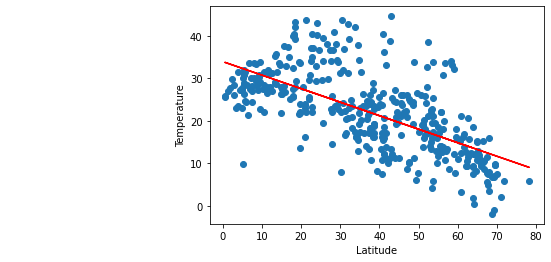

The r value is:  -0.6483403694276987


In [237]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel('Latitude')
plt.ylabel('Temperature')
linear_regression(x_values, y_values, title)

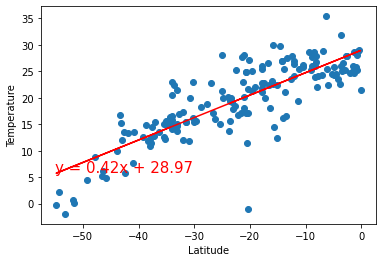

The r value is:  0.8260942396291399


In [238]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel('Latitude')
plt.ylabel('Temperature')
linear_regression(x_values, y_values, title, )

**Discussion about the linear relationship:** 

For the Nothern Hemisphere an r value of -0.705 indicates a strong negative linear relationship between temperature and latitude. This means as latitude increases the temperature decreases.

For the Southern Hemisphere an r-value of 0.806 indicates a strong positive correlation between temperature and latitude. This means as latitude increases the temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

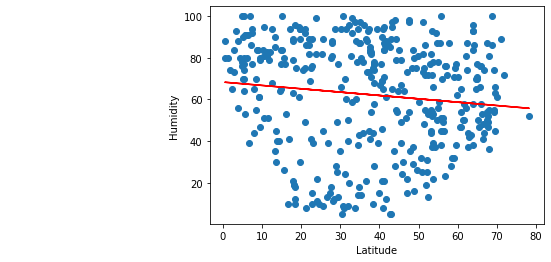

The r value is:  -0.12066377183334673


In [239]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression (x_values, y_values, title,)

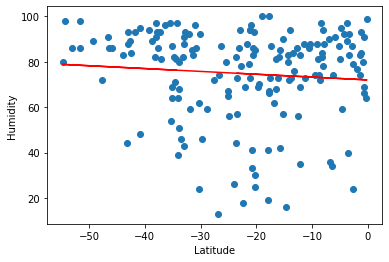

The r value is:  -0.08598880447096614


In [240]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression (x_values, y_values, title,)

**Discussion about the linear relationship:** 

For the Nothern Hemisphere an r-value of -0.158 indicates a weak negative correlation between humidity and latitude. This implies that latitude alone is not a good predictor for humidity, and there may be other factors at play that influence humidity levels. 

For the Southern Hemisphere an r-value of 0.0149 indicates an extremely weak, almost non-existent positive correlation between humidity and latitude. This implies that latitude alone is not a good predictor for humidity, and there may be other factors at play that influence humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

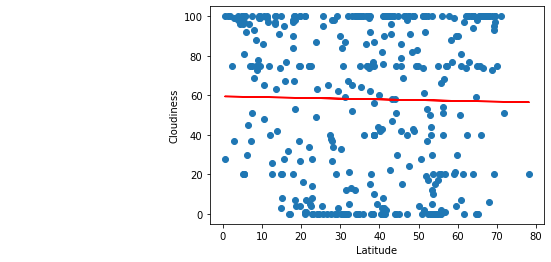

The r value is:  -0.019053696012377937


In [241]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression (x_values, y_values, title,)

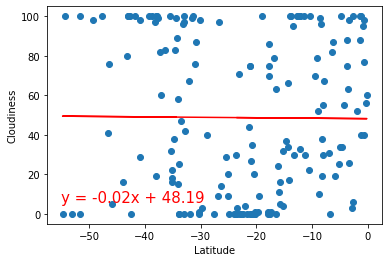

The r value is:  -0.00818235366438227


In [242]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression (x_values, y_values, title,)

**Discussion about the linear relationship:** 

The r-value of -0.108 for the Nothern Hemisphere suggests a very weak negative correlation. This means as latitude increases there's a slight tendency for cloudiness to decrease. However, this relationship is very weak, and so latitude isn't a reliable predictor of cloudiness.

The r-value of 0.019 for the Southern Hemisphere indicates an extremely weak positive correlation, meaning that as latitude increases, there's a very slight tendency for cloudiness to increase. However, this correlation is so weak that it's nearly negligible. 

### Wind Speed vs. Latitude Linear Regression Plot

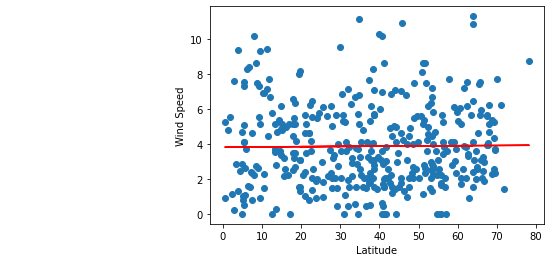

The r value is:  0.011262067937059231


In [243]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression (x_values, y_values, title,)

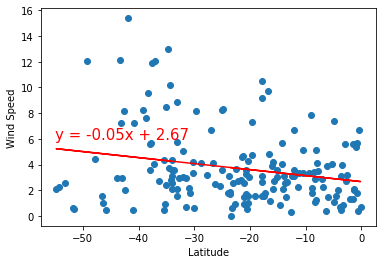

The r value is:  -0.2265626303360762


In [244]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression (x_values, y_values, title,)

**Discussion about the linear relationship:** 

The r-value of 0.0346 for the Nothern Hemisphere suggests a very weak positive correlation. This means that as the latitude increases there's a slight tendency for wind speed to increase as well. However, this correlation is so weak that it's nearly negligible. 

The r-value of -0.230 for the Southern Hemisphere indicates a weak negative correlation. This suggests that as the latitude increases, there's a tendency for the wind speed to decrease. But the relationship is not strong. 

These results suggest that wind speed is influenced by many other factors beyond just latitude.